<a href="https://colab.research.google.com/github/guilhermelaviola/BusinessIntelligenceAndBigDataArchitectureWithAppliedDataScience/blob/main/Class11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Intelligence**
Business Intelligence (BI) encompasses processes and technologies that transform raw data into actionable insights to support strategic decision-making, going beyond dashboards to include advanced analyses like data mining and exploratory data analysis. BI relies on high data quality, the ability to handle Big Data, and real-time reporting, using tools such as Looker, Amazon QuickSight, and Oracle Analytics Cloud for visualization, predictive analytics, and self-service analysis. It also plays a key role in competitive intelligence by analyzing market, customer, and competitor data, while requiring compliance with data privacy regulations like GDPR and LGPD. KPIs are central to BI, as they measure organizational performance and vary by industry and business goals. Overall, BI enables companies to make more informed decisions, identify risks and opportunities, and improve performance when implemented with reliable data and well-chosen metrics.

In [ ]:
# Importing all the necessary libraries:
import json
from urllib.request import urlopen
import requests
import matplotlib.pyplot as plt
import pandas as pd
from google.cloud import storage
from io import StringIO

## **Example: BI Case Study**
This case study concludes a Business Intelligence (BI) learning series by demonstrating the practical application of BI through the analysis of financial data obtained via a financial API. Using the Financial Model Prep API and the 2023 financial context of the company Americanas, the study shows how BI can uncover trends, anomalies, and early warning signs preceding major financial issues. By examining historical stock prices, cash flow, and key financial indicators, the analysis highlights discrepancies—such as rising working capital alongside declining net profit—that may signal structural or operational problems. Overall, the case illustrates how API-based data extraction and analysis are essential BI skills, enabling professionals to assess financial health, identify risks, and support more informed strategic decision-making.

In [ ]:
# Importing the dataset from parsed URL:
api_key = 'irtzpwJmKEKLvuT80bKLqIgJfXZBUps0'
stock_symbol = 'AMER3.SA'

url = f'https://financialmodelingprep.com/api/v3/profile/{stock_symbol}?apikey={api_key}'

# Converting the website data into JSON:
def get_jsonparsed_data(url):
  response = urlopen(url)
  data = response.read().decode('utf-8')
  return json.loads(data)

get_jsonparsed_data(url)

[{'symbol': 'AMER3.SA',
  'price': 5.57,
  'beta': -0.437,
  'volAvg': 2033590,
  'mktCap': 1115358673,
  'lastDiv': 0,
  'range': '3.07-54',
  'changes': 0.18,
  'companyName': 'Americanas S.A.',
  'currency': 'BRL',
  'cik': None,
  'isin': 'BRAMERACNOR6',
  'cusip': None,
  'exchange': 'B3 S.A.',
  'exchangeShortName': 'SAO',
  'industry': 'Specialty Retail',
  'website': 'https://ri.americanas.com',
  'description': "Americanas S.A. operates in the e-commerce business in Brazil. It connects people, businesses, products, and services on the digital platform to offer various digital solutions. The company operates Americanas.com, an online store with various products in approximately 40 categories; Submarino, a digital brand in books, games, technology, and entertainment; Shoptime, a home shopping channel that offers bed, table, bath, small appliances, housewares, and sports and leisure products; Sou Barato, an outlet that offers repackaged products; Lojas Americanas; Americanas Expr

In [ ]:
# Getting historical data of the stocks from a specified period of time:
def get_historical_data(symbol, api_key, start_date, end_date):
  url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start_date}&to={end_date}&apikey={api_key}'
  response = requests.get(url)
  data = response.json()
  return data

In [ ]:
# Defining the time periods for analysis:
start_date_2023 = '2023-01-01'
end_date_2023 = '2023-12-31'
start_date_2024 = '2024-01-01'
end_date_2024 = '2024-12-31'

In [ ]:
# Getting the historical data:
historical_data_2023 = get_historical_data(stock_symbol, api_key, start_date_2023, end_date_2023)
historical_data_2024 = get_historical_data(stock_symbol, api_key, start_date_2024, end_date_2024)

# Converting the data into a DataFrame for analysis:
df_2023 = pd.DataFrame(historical_data_2023['historical'])
df_2024 = pd.DataFrame(historical_data_2024['historical'])

# Converting the column 'date' into a datetime and making it an index:
df_2023['date'] = pd.to_datetime(df_2023['date'])

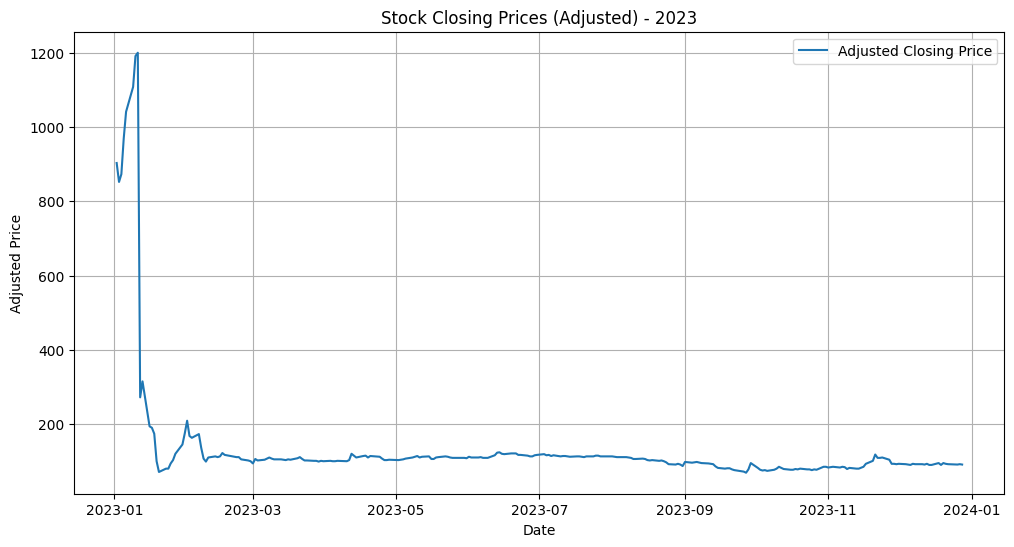

In [ ]:
# Plotting the adjusted closing prices:
plt.figure(figsize=(12, 6))
plt.plot(df_2023['date'], df_2023['adjClose'], label='Adjusted Closing Price')
plt.title('Stock Closing Prices (Adjusted) - 2023')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Displaying the DataFRame with the data from 2024:
df_2024.head()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2024-12-30,4.93,7.94,4.93,6.20,6.20,9595200,9595200,1.27,25.76,6.0000,"December 30, 24",0.2576
1,2024-12-27,5.25,5.51,4.78,5.15,5.15,4725100,4725100,-0.10,-1.90,5.1725,"December 27, 24",-0.0190
2,2024-12-26,6.00,6.05,5.20,5.20,5.20,2848800,2848800,-0.80,-13.33,5.6125,"December 26, 24",-0.1333
3,2024-12-23,6.63,6.65,5.93,5.96,5.96,1732600,1732600,-0.67,-10.11,6.2925,"December 23, 24",-0.1011
4,2024-12-20,6.63,6.85,6.48,6.63,6.63,1959700,1959700,0.00,0.00,6.6475,"December 20, 24",0.0000


In [ ]:
# Converting the column 'date' into a datetime and making it an index:
df_2024['date'] = pd.to_datetime(df_2024['date'])

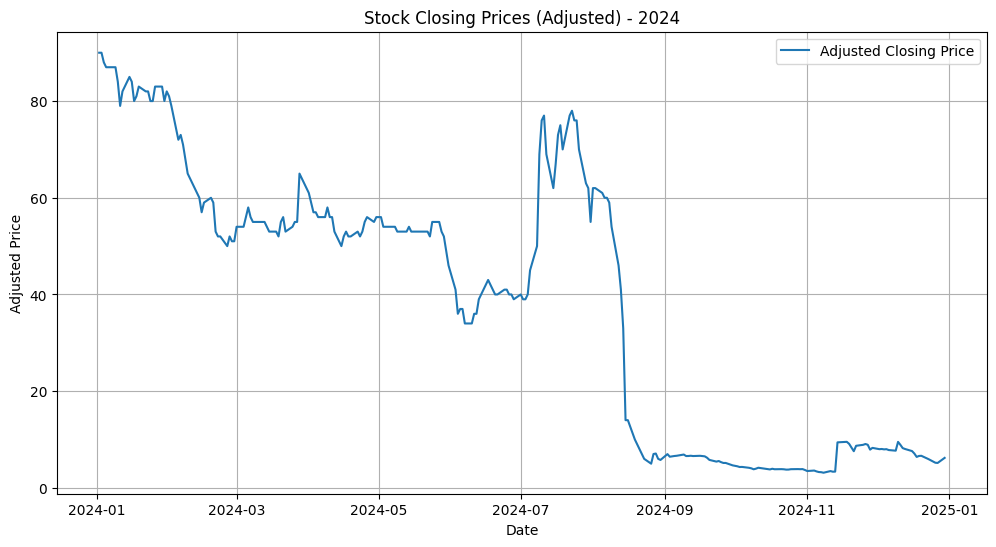

In [ ]:
# Plotting the adjusted closing prices:
plt.figure(figsize=(12, 6))
plt.plot(df_2024['date'], df_2024['adjClose'], label='Adjusted Closing Price')
plt.title('Stock Closing Prices (Adjusted) - 2024')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Getting historical data of the stocks from a specified period of time:
def get_data(metrics,symbol, annual, api_key):
  url = f'https://financialmodelingprep.com/api/v3/{metrics}/{symbol}?period={annual}&apikey={api_key}'
  response = requests.get(url)
  data = response.json()
  return data

In [ ]:
# Getting the 'Cash Flow Statement Growth' column data from 2024:
metrics_cash = get_data('cash-flow-statement-growth', stock_symbol,'2024', api_key)
metrics_cash

[{'date': '2024-12-31',
  'symbol': 'AMER3.SA',
  'calendarYear': '2024',
  'period': 'FY',
  'growthNetIncome': 4.632042253521127,
  'growthDepreciationAndAmortization': -0.27074235807860264,
  'growthDeferredIncomeTax': 0,
  'growthStockBasedCompensation': 0,
  'growthChangeInWorkingCapital': -1.4860243341006247,
  'growthAccountsReceivables': -0.4732849604221636,
  'growthInventory': -0.7941031941031941,
  'growthAccountsPayables': 0,
  'growthOtherWorkingCapital': -0.7245804540967423,
  'growthOtherNonCashItems': -3.7416247906197655,
  'growthNetCashProvidedByOperatingActivites': -13.477551020408164,
  'growthInvestmentsInPropertyPlantAndEquipment': -0.38823529411764707,
  'growthAcquisitionsNet': 0,
  'growthPurchasesOfInvestments': 0,
  'growthSalesMaturitiesOfInvestments': 0,
  'growthOtherInvestingActivites': 0.9024390243902439,
  'growthNetCashUsedForInvestingActivites': 0.9469928644240571,
  'growthDebtRepayment': 2.2809099901088032,
  'growthCommonStockIssued': 0,
  'growthC

In [ ]:
# Displaying the metrics cash data above into a DataFrame:
df  = pd.DataFrame(metrics_cash)
df.head()

,date,symbol,calendarYear,period,growthNetIncome,growthDepreciationAndAmortization,growthDeferredIncomeTax,growthStockBasedCompensation,growthChangeInWorkingCapital,growthAccountsReceivables,...,growthDividendsPaid,growthOtherFinancingActivites,growthNetCashUsedProvidedByFinancingActivities,growthEffectOfForexChangesOnCash,growthNetChangeInCash,growthCashAtEndOfPeriod,growthCashAtBeginningOfPeriod,growthOperatingCashFlow,growthCapitalExpenditure,growthFreeCashFlow
0,2024-12-31,AMER3.SA,2024,FY,4.632042,-0.270742,0.000000,0.000000,-1.486024,-0.473285,...,0,-870.500000,1.708991,0,0.127601,-0.357793,-0.290843,-13.477551,0.576471,-9.857576
1,2023-12-31,AMER3.SA,2023,FY,0.828139,-0.145522,1.000000,-1.000000,0.987582,0.695749,...,1,-1.001248,-1.179433,0,-3.899529,-0.290843,-0.056035,0.959671,0.960150,0.959795
2,2022-12-31,AMER3.SA,2022,FY,-1.119486,0.534348,0.216410,0.014901,0.958119,1.355659,...,0,191.830506,2.633480,0,0.963285,-0.056035,-0.604154,-1.368846,-3.787277,-0.964738
3,2021-12-31,AMER3.SA,2021,FY,-28.594900,0.741553,-2.752867,0.000000,2.946228,-4.253688,...,0,1.093190,-1.965464,0,-2.293579,-0.604154,0.876315,-40.518909,0.162929,-6.032523
4,2020-12-31,AMER3.SA,2020,FY,0.337735,0.151250,0.729555,0.000000,-4.160474,-0.758013,...,0,-0.279090,1.598292,0,6.450795,0.876315,0.133290,-1.391090,-0.201410,-1.083589


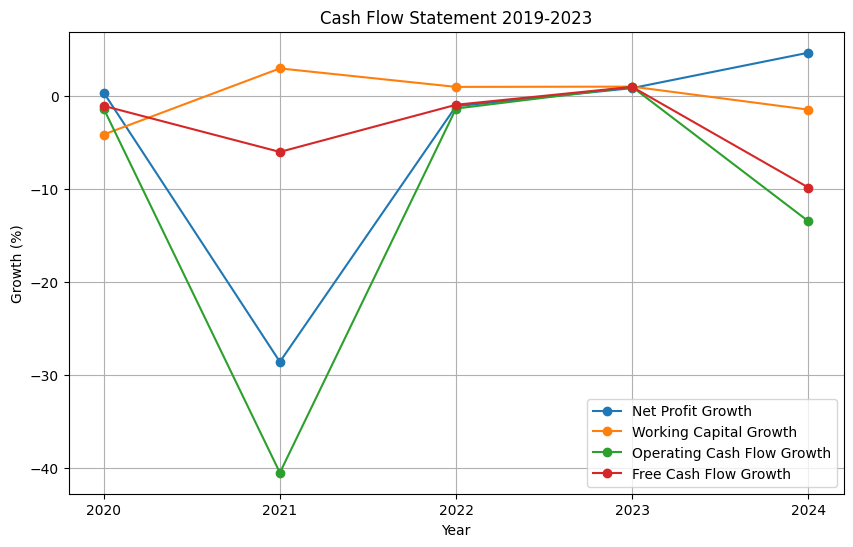

In [ ]:
# Plotting the trend analysis:
plt.figure(figsize=(10, 6))

df['calendarYear'] = df['calendarYear'].astype(int)

years = df['calendarYear'].unique()

plt.plot(df['calendarYear'],df['growthNetIncome'], label='Net Profit Growth', marker='o')
plt.plot(df['calendarYear'],df['growthChangeInWorkingCapital'], label='Working Capital Growth', marker='o')
plt.plot(df['calendarYear'],df['growthOperatingCashFlow'], label='Operating Cash Flow Growth', marker='o')
plt.plot(df['calendarYear'],df['growthFreeCashFlow'], label='Free Cash Flow Growth', marker='o')

plt.title('Cash Flow Statement 2019-2023')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.xticks(years)
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
# Selecting the desired columns:
columns_to_save = ['calendarYear', 'growthNetIncome', 'growthChangeInWorkingCapital', 'growthOperatingCashFlow', 'growthFreeCashFlow']

df_statement = df[columns_to_save]
df_statement.to_csv(f'demostrantivo-fluxo-caixa-{stock_symbol}.csv', index=False)

df_2023.to_csv(f'acoes-precos-{stock_symbol}.csv', index=False)

In [ ]:
# Uploading a file into the bucket:
def upload_blob(project_id, bucket_name, source_file_name, destination_blob_name):
  storage_client = storage.Client(project=project_id)
  bucket = storage_client.bucket(bucket_name)
  blob = bucket.blob(destination_blob_name)
  blob.upload_from_filename(source_file_name)

  print(f'File {source_file_name} upado {destination_blob_name}.')

  upload_blob('spheric-verve-405817', 'datalakedescomplica', f'demostrantivo-fluxo-caixa-{stock_symbol}.csv', 'Dados/'+f'demostrantivo-fluxo-caixa-{stock_symbol}.csv')